# Multiple Linear Regression

We analyse the effect of various advertising media on the product sells.

Features
- **TV:** advertising dollars spent on TV for a single product in a given market (in thousands of dollars)
- **Radio:** advertising dollars spent on Radio
- **Newspaper:** advertising dollars spent on Newspaper

Output
- **Sales:** sales of a single product in a given market (in thousands of items)

Model
- Because the response variable is continuous, this is a **regression** problem.
- There are 200 **observations** (represented by the rows), and each observation is a single market.

## Step 1: Problem Analysis and Framing

### Questions About the Advertising Data
On the basis of this data, how should we spend our advertising money in the future?
- Is there a relationship between ads and sales?
- How strong is that relationship?
- Which ad types contribute to sales?
- What is the effect of each ad type of sales?
- Given ad spending in a particular market, can sales be predicted?


### Needed Liblaries

In [1]:
# import
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
import sklearn.metrics as sm
from sklearn.metrics import r2_score

## Step 2: Data Preparation

In [2]:
# read CSV file from the 'data' subdirectory using a relative path
data = pd.read_csv('data/advertising.xlsx', index_col=0)

In [3]:
# check the shape of the DataFrame (rows, columns)
data.shape

(200, 4)

In [4]:
# display the first 5 rows
data.head()

,TV,Radio,Newspaper,Sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [5]:
# display the last 5 rows
data.tail()

,TV,Radio,Newspaper,Sales
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5
200,232.1,8.6,8.7,13.4


In [6]:
data.sample(5)

,TV,Radio,Newspaper,Sales
107,25.0,11.0,29.7,7.2
83,75.3,20.3,32.5,11.3
36,290.7,4.1,8.5,12.8
189,286.0,13.9,3.7,15.9
167,17.9,37.6,21.6,8.0


In [7]:
data.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


c:\Users\AxiiS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


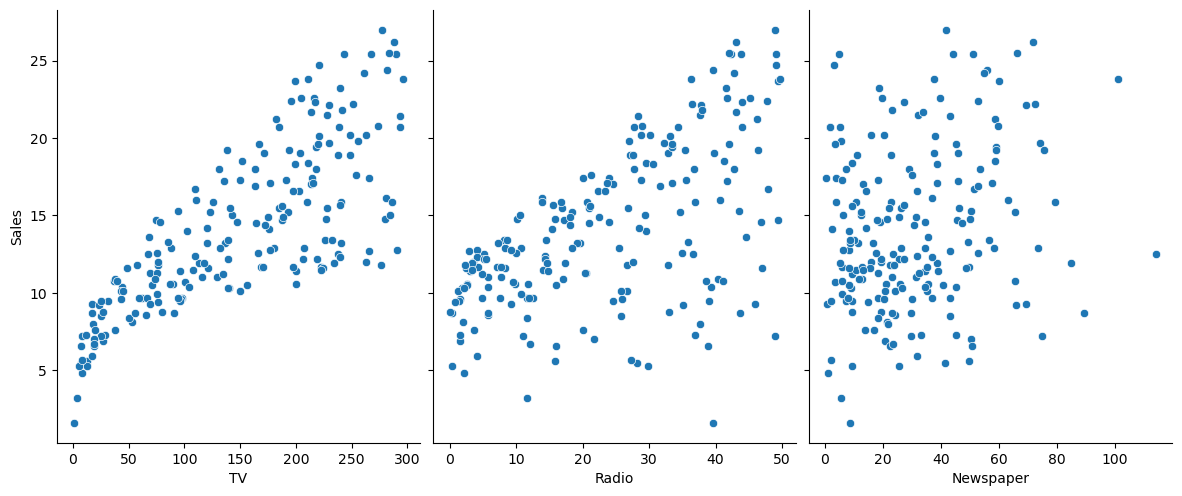

In [8]:
# visualise the features and the response using scatterplots
sns.pairplot(data, x_vars=['TV', 'Radio','Newspaper'], y_vars='Sales', height=5, aspect=0.8)

c:\Users\AxiiS\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


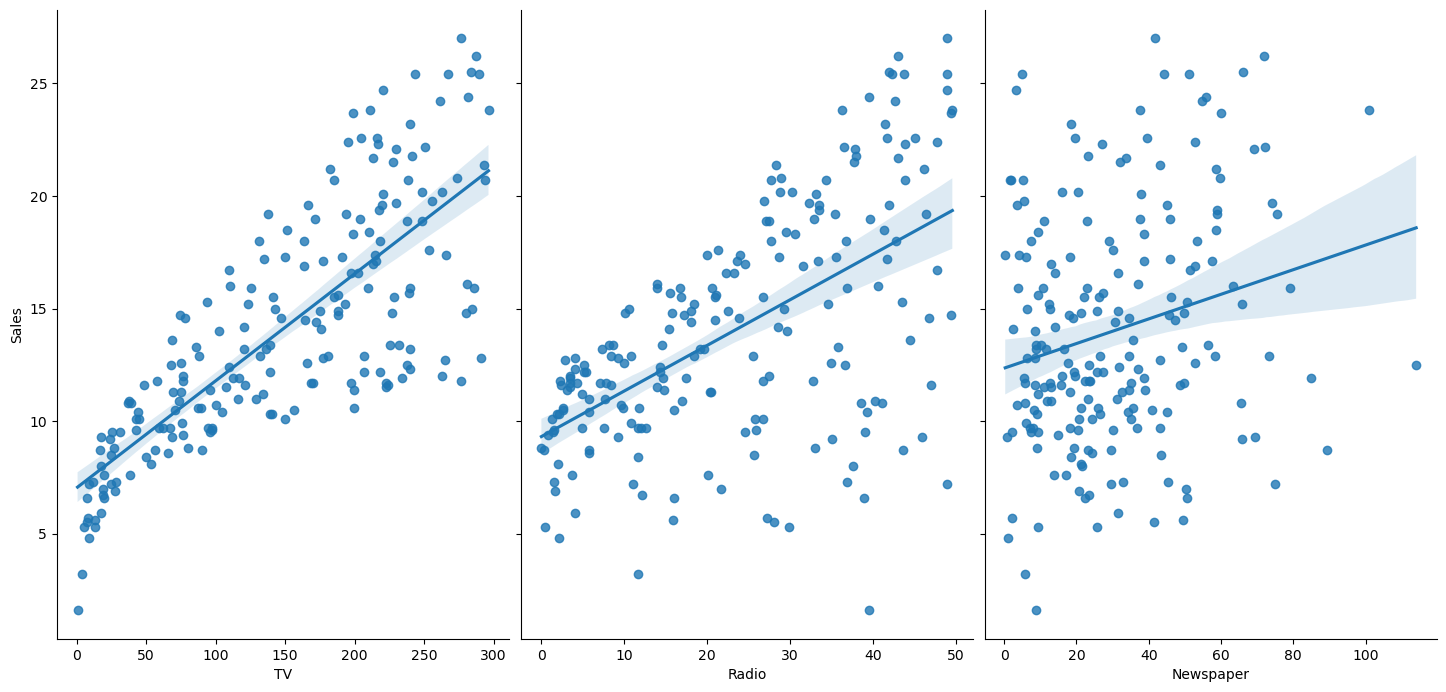

In [9]:
# Plotting the Least Squares Line¶
sns.pairplot(data, x_vars=['TV','Radio','Newspaper'], y_vars='Sales', height=7, aspect=0.7, kind='reg')

## Step 3: Train a Model

### Multiple Linear Regression

$y = \beta_0 + \beta_1x_1 + \beta_2x_2 + ... + \beta_nx_n$

- $y$ is the response
- $\beta_0$ is the intercept
- $\beta_1$ is the coefficient for $x_1$ (the first feature)
- $\beta_n$ is the coefficient for $x_n$ (the nth feature)

In this case:

$y = \beta_0 + \beta_1 \times TV + \beta_2 \times Radio + \beta_3 \times Newspaper$

The $\beta$ values are called the **model coefficients**. These values are "learned" during the model fitting step using the "least squares" criterion. Then, the fitted model can be used to make predictions!

### Preparing X and y 

- scikit-learn expects X (feature matrix) and y (response vector) to be NumPy arrays.
- However, pandas is built on top of NumPy.
- Thus, X can be a pandas DataFrame and y can be a pandas Series!

In [ ]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# print the first 5 rows
X.head()

In [ ]:
# check the type and shape of X
print(type(X))
print(X.shape)


In [ ]:
# select a Series from the DataFrame for y
y = data['Sales']

# equivalent command that works if there are no spaces in the column name
y = data.Sales

# print the first 5 values
y.head()

In [ ]:
# check the type and shape of y
print(type(y))
print(y.shape)

### Splitting X and y into Training and Testing Sets

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

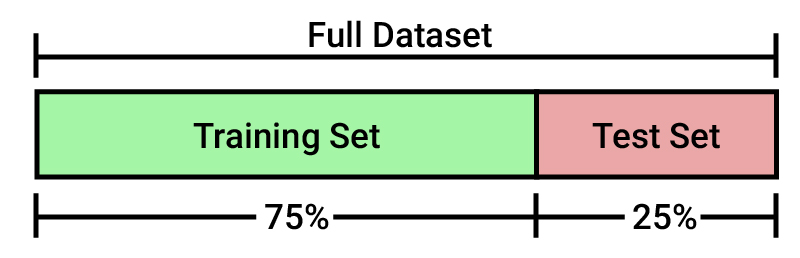

In [ ]:
# default split 75:25
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

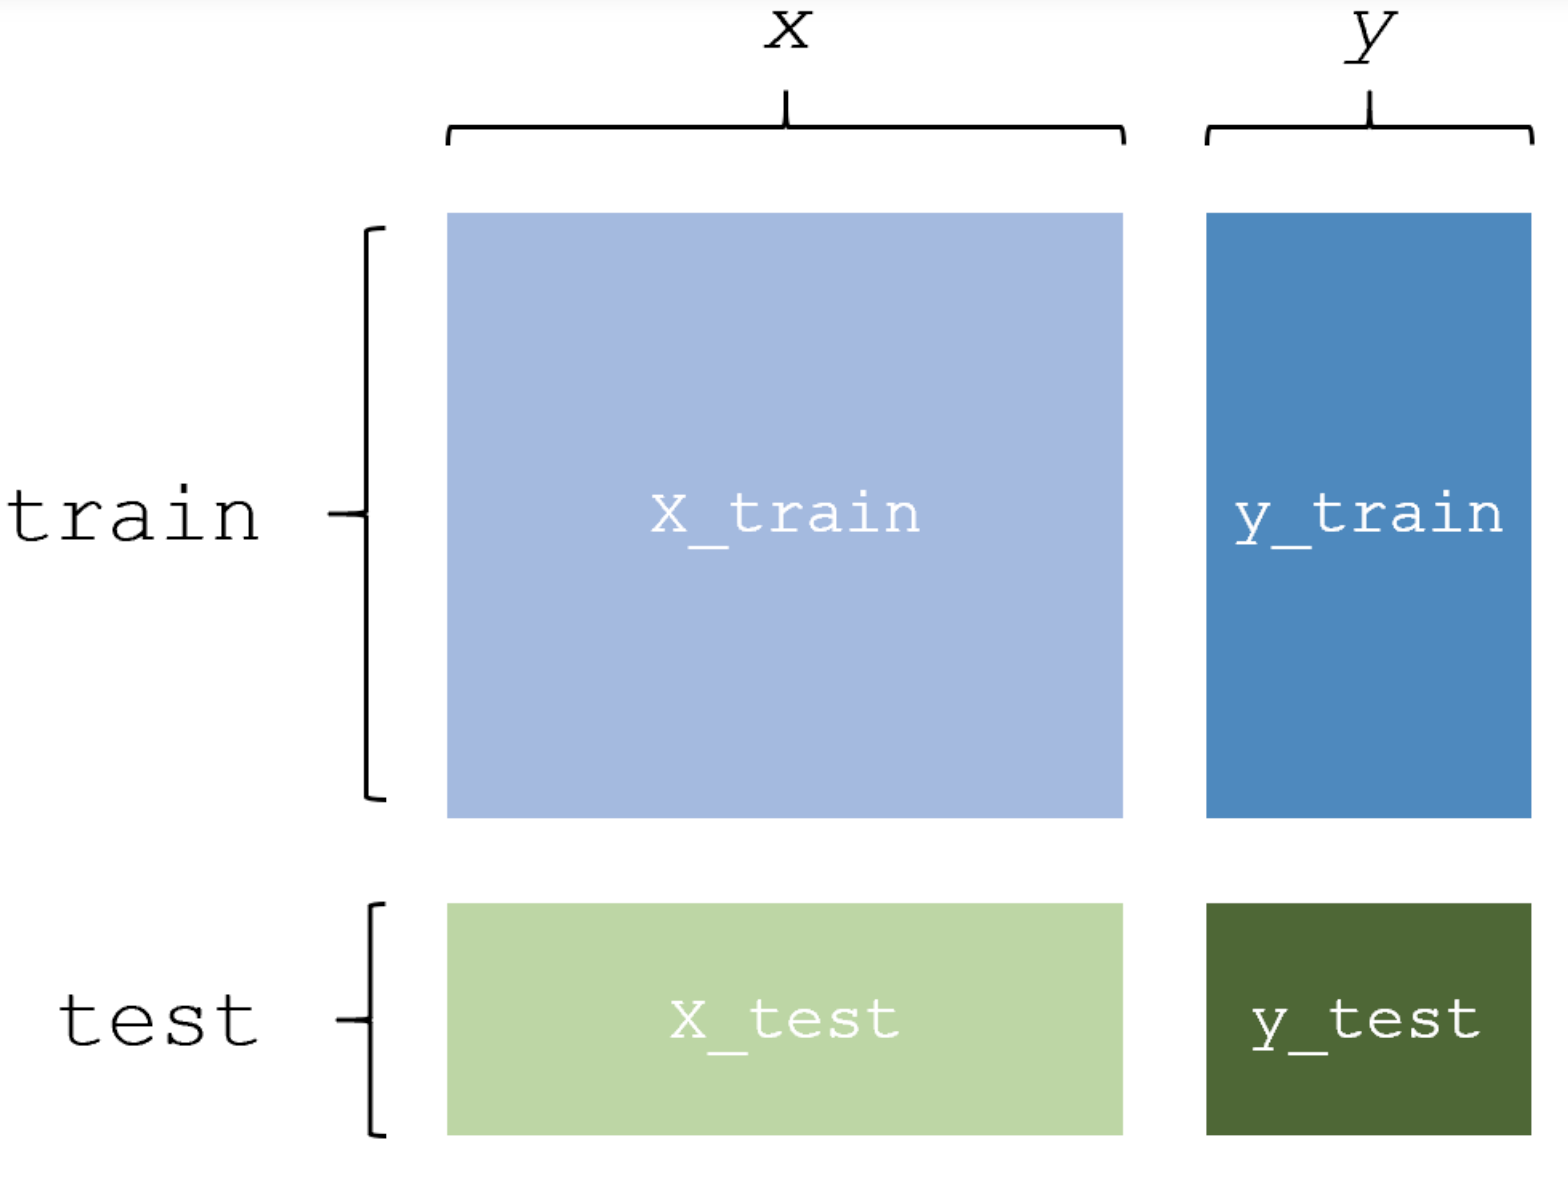

### Linear Regression by scikit-learn

In [ ]:
# create a model
linreg = LinearRegression()

# fit the model to our training data
linreg.fit(X_train, y_train)

### Interpret Model Coefficients

In [ ]:
# the intercept and coefficients are stored in system variables
print('b0 =', linreg.intercept_)
print('bi =', linreg.coef_)

In [ ]:
# pair the feature names with the coefficients
list(zip(feature_cols, linreg.coef_))

The result of the model fitting shows how the sales depend on the advertising:
$$y = 2.88 + 0.0466 \times TV + 0.179 \times Radio + 0.00345 \times Newspaper$$

Notes:
- This is a statement of **association**, not **causation**.
- If an increase in any ad spending was associated with a **decrease** in sales, $\beta_i$ would be **negative**.

Coefficients are estimated using the __least squares criterion__
We find mathematically the line, which minimizes the sum of squared residuals (or "sum of squared errors")

## Step 4: Testing the Model

In [ ]:
y_test

In [ ]:
# make predictions on the testing set
y_predicted = linreg.predict(X_test)

In [ ]:
y_predicted

## Step 5: Model Evaluation Metrics

Instead, we need evaluation metrics designed for comparing continuous values.

The **three common evaluation metrics** for regression problems are:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

In [ ]:
# calculate MAE using scikit-learn
from sklearn import metrics

In [ ]:
print(metrics.mean_absolute_error(y_test, y_predicted))

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

In [ ]:
# calculate MSE using scikit-learn
print(metrics.mean_squared_error(y_test, y_predicted))

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

In [ ]:
# calculate RMSE using scikit-learn
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

### R-squared

In [ ]:
# Explained variance (1 would be the best prediction)
eV = round(sm.explained_variance_score(y_test, y_predicted), 6)
print('Explained variance score ',eV )

In [ ]:
# R-squared
r2_score(y_test, y_predicted)

In [ ]:
# Visualise the regression results
plt.title('Multiple Linear Regression')
plt.scatter(y_test, y_predicted, color='blue')
plt.show()

### Using the Model for Prediction

Let's say that there was a new market where the TV advertising spend was $50,000. What would we predict for the Sales in that market?

In [ ]:
# manual calculation
# b0 = 2.9272373202664816
# bi = [0.04660234 0.18117959]
sale = 2.92723 + 0.04660 * 50 
sale

In [ ]:
# the trained model
X_new = pd.DataFrame({'TV': [50], 'Radio': [0]})
sale = linreg.predict(X_new)
sale

### Can We Improve the Model by Feature Selection?

**Newspaper** has very low coeficient, we can try to remove it and evaluate the new regression again.

In [ ]:
# create a Python list of feature names
feature_cols = ['TV', 'Radio']

# use the list to select a subset of the original DataFrame
X = data[feature_cols]

# select a Series from the DataFrame
y = data.Sales

# split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)

# make predictions on the testing set
y_predicted = linreg.predict(X_test)

# compute the RMSE of our predictions
print(np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

The RMSE **decreased** when we removed Newspaper from the model. (Error is something we want to minimize, so **a lower number for RMSE is better**.)

In [ ]:
# R-squared
k=r2_score(y_test, y_predicted)
k

We are aiming at bigger R-squared, close to 1.00, so improvement is valued.

## Comparison of Models: AIC

Akaike information criterion (AIC) is a mathematical method for evaluating how well a model fits the data it was generated from. In statistics, AIC is used to compare different possible models and determine which one is the best fit for the data. AIC is calculated from:

- the number of independent variables used to build the model.
- the maximum likelihood estimate of the model (how well the model reproduces the data).

The best-fit model according to AIC is the one that explains the greatest amount of variation using the fewest possible independent variables.

The formula for AIC is:

    AIC = 2K - 2ln(L)
    
- K is the number of independent variables used
- L is the log-likelihood estimate (a.k.a. the likelihood that the model could have produced your observed y-values). <br>
The default K is always 2, so if your model uses one independent variable your K will be 3, if it uses two independent variables your K will be 4, and so on.<br>

To compare models using AIC, you need to calculate the AIC of each model. If a model is more than 2 AIC units lower than another, then it is considered significantly better than that model.
Source: https://www.scribbr.com/statistics/akaike-information-criterion/_

We use the __OLS()__ function from the __statsmodels__ library

In [ ]:
import statsmodels.api as sm

In [ ]:
def olsi(data, f_cols):
    X = data[f_cols]
    y = data['Sales']
    X = sm.add_constant(X)
    #fit linear regression model
    model = sm.OLS(y, X).fit()
    return model

In [ ]:
feature_cols = ['TV', 'Newspaper']

In [ ]:
feature_cols = ['TV', 'Newspaper', 'Radio']

In [ ]:
model = olsi(data, feature_cols)

In [ ]:
# view AIC of the model - lower is better
model.aic

In [ ]:
model.summary()

### Interpretation of Coeficients

- __R-squared__ is known as the _coefficient of determination_. It is the proportion of the variance in the dependant variable that can be explained by the predictor variables (the errors we know exist).
- __Ho__ - null hypothesis: Sales doesn't depend on predictors, aall coeficients are 0; __Ha__ states the oposite.
- __F-statistic__ is overall measure of the model, used for rejecting or not the null hypothesis.
- __Prob (F-statistic)__ is __p-value__, compared to a common value of 0.05. Smaller p-value - more probable Ho is to be rejected.
- __P>|t|__ - individual __p-value__ for each predictor - tells how significant it is.

## Resources

- [An Introduction to Statistical Learning](https://www.statlearning.com/) and [related videos](https://www.dataschool.io/15-hours-of-expert-machine-learning-videos/) 
- [Introduction to linear regression](http://people.duke.edu/~rnau/regintro.htm)
-  https://scikit-learn.org/stable/auto_examples/linear_model/plot_ols.html#sphx-glr-auto-examples-linear-model-plot-ols-py
